<a href="https://colab.research.google.com/github/glomanu/football-home-adv/blob/main/Kopia_notatnika_Home_adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported the functions that might come of use throughout the investigation

In [3]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [4]:
df1=pd.read_csv('results.csv') #remember to upload the file
df2=pd.read_csv('shootouts.csv') #remember to upload the file
df1, df2

(             date home_team         away_team  home_score  away_score  \
 0      1872-11-30  Scotland           England         0.0         0.0   
 1      1873-03-08   England          Scotland         4.0         2.0   
 2      1874-03-07  Scotland           England         2.0         1.0   
 3      1875-03-06   England          Scotland         2.0         2.0   
 4      1876-03-04  Scotland           England         3.0         0.0   
 ...           ...       ...               ...         ...         ...   
 44055  2022-09-27    Norway            Serbia         0.0         2.0   
 44056  2022-09-27    Sweden          Slovenia         1.0         1.0   
 44057  2022-09-27    Kosovo            Cyprus         5.0         1.0   
 44058  2022-09-27    Greece  Northern Ireland         3.0         1.0   
 44059  2022-09-30      Fiji   Solomon Islands         NaN         NaN   
 
                      tournament        city   country  neutral  
 0                      Friendly     Glasgow

In [5]:
print(df1.dtypes)
print()
print(df2.dtypes)

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral          bool
dtype: object

date         object
home_team    object
away_team    object
winner       object
dtype: object


Some rows have NaN value, so I will delete them.

In [6]:
df1 = df1.dropna()
df2 = df2.dropna()

In [7]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False


In [8]:
len(df1['date'])

44059

In [9]:
df1['outcome'] = 0
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,0
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,0
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,0


In [10]:
for i in range(0, len(df1['date'])):
  if df1.iloc[i][3] > df1.iloc[i][4]:
    df1['outcome'][i] = 1
  elif df1.iloc[i][3] == df1.iloc[i][4]:
    df1['outcome'][i] = 0
  else:
    df1['outcome'][i] = -1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,-1
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1


In [12]:
for i in range(0, len(df1['date'])):
  rowi = df1.iloc[i]
  if rowi[9]!=0:
    continue
  for j in range(0, len(df2['date'])):
    rowj = df2.iloc[j]
    if rowi[0]==rowj[0] and rowi[1]==rowj[1]:
      if rowj[1] == rowj[3]:
        df1['outcome'][i] = 1
      else:
        df1['outcome'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,-1
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1


In [14]:
len(df1['date'])

44059

In [15]:
for i in range(0, len(df1['date'])-1):
  if df1.iloc[i][9]!=0:
    continue
  for j in range(0, len(df2['date'])-1):
    if df1.iloc[i][0]==df2.iloc[j][0] and df1.iloc[i][1]==df2.iloc[j][1]:
      if df2.iloc[j][1] == df2.iloc[j][3]:
        df1.iloc[i][9] = 1
      else:
        df1.iloc[i][9] = -1

In [16]:
len(df1['date'])

44059

In [17]:
df1.iloc[1][0]=='1873-03-08'

True

In [18]:
df1.iloc[len(df1['date'])-2][3]

5.0

In [19]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,-1
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1


In [20]:
rowi = df1.iloc[1]
rowj = df2.iloc[187]
rowi[1]==rowj[1]


True

In [21]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,-1
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1


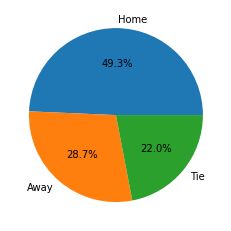

In [33]:
wins=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
plt.pyplot.pie(wins,labels=wins.index,autopct='%.1f%%') #construct the pie chart
plt.pyplot.show() #makes the pie chart